In [62]:
#ΟΝΟΜΑ : Χρήστος Τριανταφύλλου Αρχολέκας
#AM : 1115201700166

#ΟΝΟΜΑ : Ιωάννης Τζιεράκης
#ΑΜ : 1115201700163

#CREATE TRAIN.CSV,TEST.CSV AND DATAFRAME

import pandas as pd
import numpy as np
from tqdm import tqdm
import nltk 
from nltk.collocations import *
from nltk.metrics import (
    ContingencyMeasures,
    BigramAssocMeasures
)
from nltk.util import ngrams
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import re 
import os
import sys
import errno
import glob
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

path1 = r'C:\Users\pltzi\Desktop\data mining\PRJ2\fulltext\fulltext\data\business\*txt'
path2 = r'C:\Users\pltzi\Desktop\data mining\PRJ2\fulltext\fulltext\data\entertainment\*txt' 
path3 = r'C:\Users\pltzi\Desktop\data mining\PRJ2\fulltext\fulltext\data\politics\*txt'
path4 = r'C:\Users\pltzi\Desktop\data mining\PRJ2\fulltext\fulltext\data\sport\*txt'
path5 = r'C:\Users\pltzi\Desktop\data mining\PRJ2\fulltext\fulltext\data\tech\*txt'

# path1 = r'D:\DIT\Python Programs\DataMining\Prj2\data\business\*txt'
# path2 = r'D:\DIT\Python Programs\DataMining\Prj2\data\entertainment\*txt' 
# path3 = r'D:\DIT\Python Programs\DataMining\Prj2\data\politics\*txt'
# path4 = r'D:\DIT\Python Programs\DataMining\Prj2\data\sport\*txt'
# path5 = r'D:\DIT\Python Programs\DataMining\Prj2\data\tech\*txt'

column_names = ["id", "title", "content","category"]
train_df = pd.DataFrame(columns = column_names)
test_df = pd.DataFrame(columns = column_names)
id_sum = 0


for i in range(5):
    titles = []
    contents = []
    if i == 0: 
        files1 = glob.glob(path1)
    elif i == 1 :
        files1 = glob.glob(path2)
    elif i == 2 :
        files1 = glob.glob(path3)
    elif i == 3 :
        files1 = glob.glob(path4)    
    elif i == 4 :
        files1 = glob.glob(path5)
    
    prc = 0
    for name in files1:
        x = -1
        prc += 1
        try:
            with open(name) as f:
                lines = []
                for line in f:
                    x += 1
                    if x!=0:
                        lines.append(line)
                    else:
                        titles.append(line)
                
                striga = str(lines)
                contents.append(striga)
            
            
                    
                 
               
        except IOError as exc:
            if exc.errno != errno.EISDIR:
                raise
    
    # column_names = ["id", "title", "content","category"]
    df = pd.DataFrame(columns = column_names)
    for p in range(len(files1)):
        df['id'] = np.arange(len(files1)) + id_sum
        
    id_sum += prc        
        
    k = 0    
    for j in titles:
        df['title'][k] = j
        k += 1   


    k = 0    
    for m in contents:
        df['content'][k] = m
        k += 1

    if i == 0: 
        df['category'] = 'business'
        df['category'].fillna('business', inplace = True)
    elif i == 1 :
        df['category'] = 'entertainment'
        df['category'].fillna('entertainment', inplace = True)
    elif i == 2 :
        df['category'] = 'politics'
        df['category'].fillna('politics', inplace = True)
    elif i == 3 :
        df['category'] = 'sport'
        df['category'].fillna('sport', inplace = True)    
    elif i == 4 :
        df['category'] = 'tech'
        df['category'].fillna('tech', inplace = True)   
    

    train_prc = prc*80/100
    train_df = train_df.append(df.head(int(train_prc)))
    test_prc = prc*20/100
    test_df = test_df.append(df.tail(int(test_prc)))
    
# train_df['content']=train_df['content'].str.replace('n','')    
# test_df['content']=test_df['content'].str.replace('n','')
train_df.to_csv("train_set.csv",index = False, header = True)
test_df.to_csv("test_set.csv",index = False, header = True)

C:\Users\pltzi\anaconda3\lib\site-packages\ipykernel_launcher.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\pltzi\anaconda3\lib\site-packages\ipykernel_launcher.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [2]:
#QUESTION 1

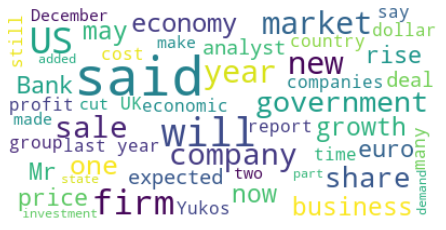

In [3]:
text = train_df['content'].loc[train_df['category'] == 'business'].values
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS ,max_font_size=50, max_words=50, background_color="white").generate(str(text))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
text = train_df['content'].loc[train_df['category'] == 'entertainment'].values
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS ,max_font_size=50, max_words=50, background_color="white").generate(str(text))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

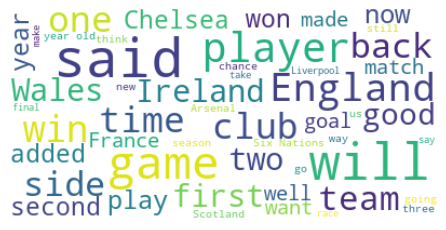

In [5]:
text = train_df['content'].loc[train_df['category'] == 'sport'].values
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS ,max_font_size=50, max_words=50, background_color="white").generate(str(text))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

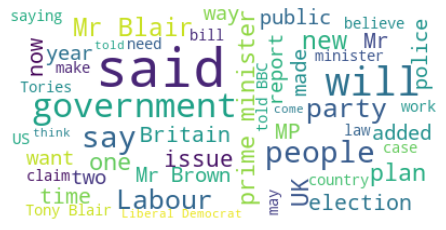

In [6]:
text = train_df['content'].loc[train_df['category'] == 'politics'].values
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS ,max_font_size=50, max_words=50, background_color="white").generate(str(text))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

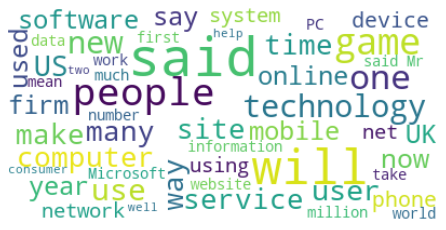

In [7]:
text = train_df['content'].loc[train_df['category'] == 'tech'].values
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS ,max_font_size=50, max_words=50, background_color="white").generate(str(text))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [8]:
#Question 2

In [13]:
txt1 = train_df['content']
txt2 = test_df['content']

#create train and test y's
Train_Y = train_df['category']
Test_Y = test_df['category']

In [14]:
#Support Vector Machines (SVM)

In [15]:
#BOW

In [21]:
#creating BOW vectorizer and bow train and test x's
BOW_vectorizer = CountVectorizer()
BOW_Train_X = BOW_vectorizer.fit_transform(txt1).toarray()
BOW_Test_X = BOW_vectorizer.transform(txt2).toarray()


In [ ]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 3]}
svc = svm.SVC(probability=True)
svclassifier = GridSearchCV(svc, parameters)
clf=svclassifier.fit(BOW_Train_X,Train_Y)
scores = cross_validate(clf, BOW_Test_X, Test_Y, scoring="accuracy")
print(scores)

In [39]:
scoring=['precision_macro','recall_macro','f1_macro']
scores = cross_validate(clf,BOW_Test_X, Test_Y, scoring=scoring)
print(scores)

NameError: name 'clf' is not defined

In [ ]:
scores = cross_validate(clf,BOW_Test_X, Test_Y, scoring="roc_auc_ovr")
print(scores)

In [ ]:
#TF_IDF

In [58]:
#creating TF-IDF vectorizer and tf-idf train and test x's 
TF_IDF_vectorizer = TfidfVectorizer(ngram_range = (1, 2),stop_words=STOPWORDS) 
TF_IDF_Train_X = TF_IDF_vectorizer.fit_transform(txt1).toarray()
TF_IDF_Test_X = TF_IDF_vectorizer.transform(txt2).toarray()

C:\Users\pltzi\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:

clf=svclassifier.fit(TF_IDF_Train_X,Train_Y)
scores = cross_validate(clf, TF_IDF_Test_X, Test_Y, scoring="accuracy")
print(scores)

In [ ]:
scoring=['precision_macro','recall_macro','f1_macro']
scores = cross_validate(clf, TF_IDF_Test_X, Test_Y, scoring=scoring)
print(scores)

In [ ]:
scores = cross_validate(clf, TF_IDF_Test_X, Test_Y, scoring="roc_auc_ovr")
print(scores)

In [ ]:
#Random Forests

In [ ]:
#BOW

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier=RandomForestClassifier(n_estimators=100)

clf = RFclassifier.fit(BOW_Train_X,Train_Y)
scores = cross_validate(clf, BOW_Test_X, Test_Y, scoring="accuracy")
print(scores)

In [ ]:
scoring=['precision_macro','recall_macro','f1_macro']
scores = cross_validate(clf,BOW_Test_X, Test_Y, scoring=scoring)
print(scores)

In [ ]:
scores = cross_validate(clf,BOW_Test_X, Test_Y, scoring="roc_auc_ovr")
print(scores)

In [ ]:
#TF_IDF

In [ ]:
clf = RFclassifier.fit(TF_IDF_Train_X,Train_Y)
scores = cross_validate(clf, TF_IDF_Test_X, Test_Y, scoring="accuracy")
print(scores)

In [ ]:
scoring=['precision_macro','recall_macro','f1_macro']
scores = cross_validate(clf, TF_IDF_Test_X, Test_Y, scoring=scoring)
print(scores)

In [ ]:
scores = cross_validate(clf,TF_IDF_Test_X, Test_Y, scoring="roc_auc_ovr")
print(scores)

In [ ]:
#Naive Bayes

In [ ]:
#BoW

In [40]:
gnb = GaussianNB()
clf = gnb.fit(BOW_Train_X,Train_Y)
scores = cross_validate(clf, BOW_Test_X, Test_Y, scoring="accuracy")
print(scores)

{'fit_time': array([0.27339888, 0.20585251, 0.20470428, 0.21424866, 0.21482682]), 'score_time': array([0.14738512, 0.140625  , 0.146909  , 0.1399641 , 0.14108253]), 'test_score': array([0.83146067, 0.92134831, 0.88764045, 0.91011236, 0.93181818])}


In [41]:
scoring=['precision_macro','recall_macro','f1_macro']
scores = cross_validate(clf,BOW_Test_X, Test_Y, scoring=scoring)
print(scores)

{'fit_time': array([0.22216177, 0.20445681, 0.20923877, 0.21043873, 0.22742176]), 'score_time': array([0.14767575, 0.14364743, 0.15954375, 0.14165401, 0.13962007]), 'test_precision_macro': array([0.85442105, 0.93132832, 0.88833333, 0.90841503, 0.93063725]), 'test_recall_macro': array([0.84095238, 0.92504202, 0.88      , 0.91297619, 0.93063725]), 'test_f1_macro': array([0.82346109, 0.92357642, 0.87880952, 0.90933177, 0.93063725])}


In [42]:
scores = cross_validate(clf,BOW_Test_X, Test_Y, scoring="roc_auc_ovr")
print(scores)

{'fit_time': array([0.2189188 , 0.21850061, 0.21140289, 0.29125094, 0.28167963]), 'score_time': array([0.161623  , 0.14857221, 0.15361881, 0.14658594, 0.15114546]), 'test_score': array([0.89973085, 0.95273052, 0.92614255, 0.94537037, 0.9568018 ])}


In [43]:
#TF_IDF

In [59]:
clf = gnb.fit(TF_IDF_Train_X,Train_Y)
scores = cross_validate(clf, TF_IDF_Test_X, Test_Y, scoring="accuracy")
print(scores)

{'fit_time': array([4.62583017, 2.70329595, 2.86760736, 2.47513556, 2.6883595 ]), 'score_time': array([1.68000579, 1.81985378, 1.66541958, 1.803967  , 1.90343523]), 'test_score': array([0.79775281, 0.93258427, 0.8988764 , 0.91011236, 0.95454545])}


In [60]:
scoring=['precision_macro','recall_macro','f1_macro']
scores = cross_validate(clf,TF_IDF_Test_X, Test_Y, scoring=scoring)
print(scores)

{'fit_time': array([3.07757854, 3.11440921, 3.44455361, 2.62570786, 2.45309734]), 'score_time': array([2.01575518, 1.84257102, 1.7951808 , 1.68821549, 1.69965887]), 'test_precision_macro': array([0.82766682, 0.94126984, 0.89668969, 0.90906863, 0.95267974]), 'test_recall_macro': array([0.80178571, 0.93680672, 0.8925    , 0.91297619, 0.95490196]), 'test_f1_macro': array([0.78753036, 0.93437479, 0.89125817, 0.9085361 , 0.95293689])}


In [61]:
scores = cross_validate(clf,TF_IDF_Test_X, Test_Y, scoring="roc_auc_ovr")
print(scores)

{'fit_time': array([2.96187401, 2.496279  , 2.94236803, 2.42540479, 2.76643515]), 'score_time': array([1.6640141 , 1.79198527, 1.66200757, 1.74951553, 1.63724351]), 'test_score': array([0.87599987, 0.96008346, 0.93384182, 0.94544978, 0.97187533])}


In [64]:
from scipy.spatial import distance


class KNearestNeighbors:

    def __init__(self, k=3, distance_metric=distance.euclidean):
        """Initialize k value and distance metric used for model."""
        self.k = k
        self.distance = distance_metric
        self.data = None

    def fit(self, X, y):
        """Zip labels and input data together for classification."""
        # raise value error if inputs are wrong length or different types
        if len(X) != len(y) or type(X) != type(y):
            raise ValueError("X and y are incompatible.")
        # convert ndarrays to lists
        if type(X) == np.ndarray:
            X, y = X.tolist(), y.tolist()
        # set data attribute containing instances and labels
        self.data = [X[i]+[y[i]] for i in range(len(X))]

    def predict(self, a):
        """Predict class based on k-nearest neighbors."""
        neighbors = []
        # create mapping from distance to instance
        distances = {self.distance(x[:-1], a): x for x in self.data}
        # collect classes of k instances with shortest distance
        for key in sorted(distances.keys())[:self.k]:
            neighbors.append(distances[key][-1])
        # return most common vote
        return max(set(neighbors), key=neighbors.count)   

In [65]:
txtK = train_df['category']
Train2Y = BOW_vectorizer.transform(txtK).toarray()
Kclf = KNearestNeighbors()
Kclf.fit(BOW_Train_X,Train2Y)
scores = cross_validate(Kclf, BOW_Test_X, Test_Y, scoring="accuracy")

TypeError: Cannot clone object '<__main__.KNearestNeighbors object at 0x000002049D81C048>' (type <class '__main__.KNearestNeighbors'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.